In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import glob
import xml.etree.ElementTree as ET
import fnmatch
import os,sys
import random
from PIL import Image

Read all Annotations and store in bufffer

In [5]:
# Choose train2014 or val2014         
# This is specifically for coco dataset because file name ccontains the information that image is in train set
# or val set and we search this string in file name to load the annotations
#img_set = 'train2014'
img_set = 'val2014'

# Path where all annotations are stored
path = 'Annotations/' + '*.xml' 
#path = 'test_annotations/' + '*.xml' 
files = glob.glob(path)
print len(files)

14536


Crop Images for each class and store it in respective folder and generate labels and store them in labels directory

In [6]:
print 'Generating Data and Labels............'

search_str = '*' + img_set + '*'

# chnage destination directory location to where you wants to store the cropped images
loc = 'images/' + img_set[:-4] 
destination_path = { 'umbrella' : loc + '/umbrella/', 'suitcase' : loc + '/suitcase/', 
                    'toilet' : loc + '/toilet/', 'scissor' : loc + '/scissor/', 
                    'laptop' : loc + '/laptop/'}

# create directories if not exist
for key,value in destination_path.items():
    dir = os.path.dirname(value)
    if not os.path.exists(dir):
        os.makedirs(dir)

# creating directory for labels
dir = os.path.dirname('labels/')
if not os.path.exists(dir):
        os.makedirs(dir)
        
# label file names
label_filename = { 'umbrella' : 'labels/umbrella_' + img_set[:-4] + '.txt', 
                  'suitcase' : 'labels/suitcase_' + img_set[:-4] + '.txt', 
                  'toilet' : 'labels/toilet_' + img_set[:-4] + '.txt', 
                  'scissor' : 'labels/scissor_' + img_set[:-4] + '.txt', 
                  'laptop' : 'labels/laptop_' + img_set[:-4] + '.txt'}

#Iterating through each annotation file
for infile in files:
    # check if train or val annotations
    if fnmatch.fnmatch(infile, search_str):
        
        tree = ET.parse(infile)
        root = tree.getroot()
        
        # Extract image name
        filename = root.find('filename').text
        file_path = root.find('path').text
        
        # load the image 
        img = Image.open(file_path)
        
        # loop through objects in annotation and extract object name and bbox
        objects = root.findall('object')
        for idx, obj in enumerate(objects):
            name = obj.find('name').text
            
            # extract class and state info... example: suitcase_openSuitcase
            cls, state = name.split('_')
            
            # extract image patch
            bndbox = obj.find('bndbox')
            x1 = bndbox.find('xmin').text
            y1 = bndbox.find('ymin').text
            x2 = bndbox.find('xmax').text
            y2 = bndbox.find('ymax').text
            
            new_img = img.crop((int(x1),int(y1),int(x2),int(y2)))
            
            # creating new file name for cropped image and save cropped into specific folder
            new_name = destination_path[cls] + filename + '_' + str(idx) + '.jpg'           
            new_img.save(new_name)
            
            # generating label and appending it to train/ val .txt
            # label 0 for 'open' and 1 for 'close'
            label = ''  
            with open(label_filename[cls], 'a+') as f:
                if 'open' in state:
                    # open 0
                    label = filename + '_' + str(idx) + '.jpg' + ' ' + '0' + '\n'
                else:
                    # close 1
                    label = filename + '_' + str(idx) + '.jpg' + ' ' + '1' + '\n'
                f.write(label)
             
    
print 'Done.'

Generating Data and Labels............
Done.


Select Random file from croppped image and display for sanity check

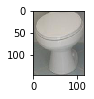

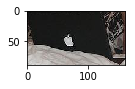

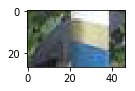

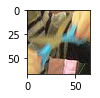

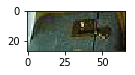

In [7]:
# random slect file from cropped images and display
images = []
for key,value in destination_path.items():
    dir = os.path.dirname(value)
    filename = random.choice(os.listdir(dir))
    path = os.path.join(dir, filename)
    images.append(matplotlib.image.imread(path))

plt.figure()
columns = 1

for i, image in enumerate(images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.show()